In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
os.chdir(os.getcwd().replace("/experiments", ""))

In [36]:
raw_train_data = pd.read_csv('data/raw/train.csv')
raw_test_data = pd.read_csv('data/raw/test.csv')

In [37]:
raw_train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
raw_train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [39]:
raw_train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
train_df = raw_train_data.copy()
test_df = raw_test_data.copy()

In [41]:
train_df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [42]:
Y_train = train_df['Loan_Status']
train_df = train_df.drop('Loan_Status', axis=1)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


##### dropping unnecessary columns

In [44]:
train_df.drop('Loan_ID', axis=1, inplace=True)
test_df.drop('Loan_ID', axis=1, inplace=True)

##### drop duplicates

In [45]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

##### check null values

In [46]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [47]:
test_df.isna().sum()

Gender               11
Married               0
Dependents            9
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### impute missing values

In [48]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

In [49]:
num_columns = train_df.select_dtypes(exclude=['object']).columns
cat_columns = train_df.select_dtypes(include=['object']).columns

print("Numerical Columns: \n", num_columns)
print("\nCategorical Columns: \n", cat_columns)

Numerical Columns: 
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Categorical Columns: 
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [50]:
train_df[num_columns] = num_imputer.fit_transform(train_df[num_columns])
train_df[cat_columns] = cat_imputer.fit_transform(train_df[cat_columns])

test_df[num_columns] = num_imputer.transform(test_df[num_columns])
test_df[cat_columns] = cat_imputer.transform(test_df[cat_columns]) 

In [51]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##### plot the train categorical columns

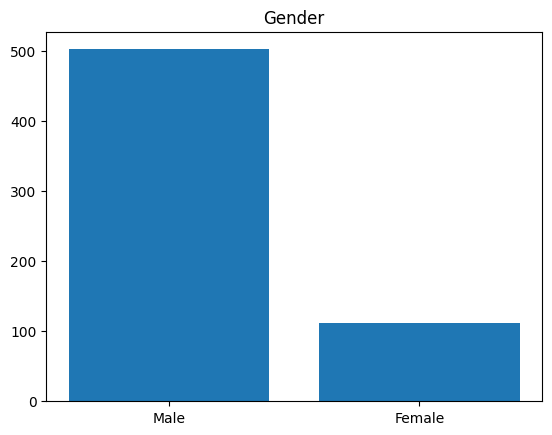

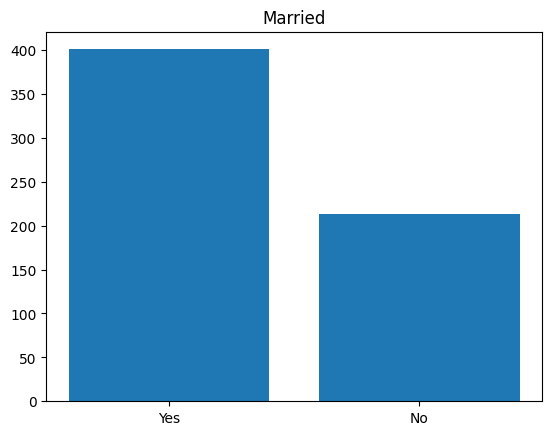

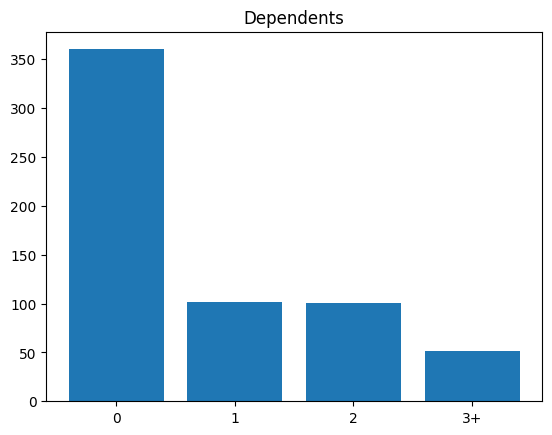

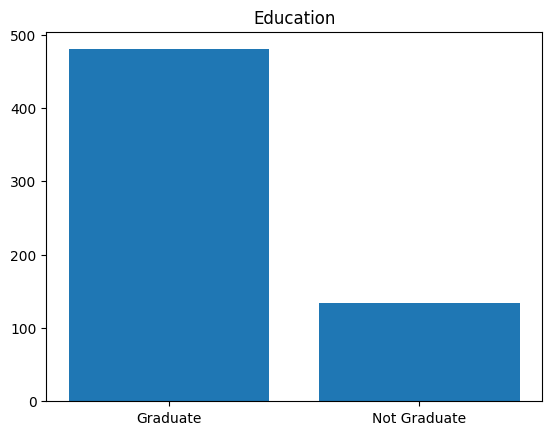

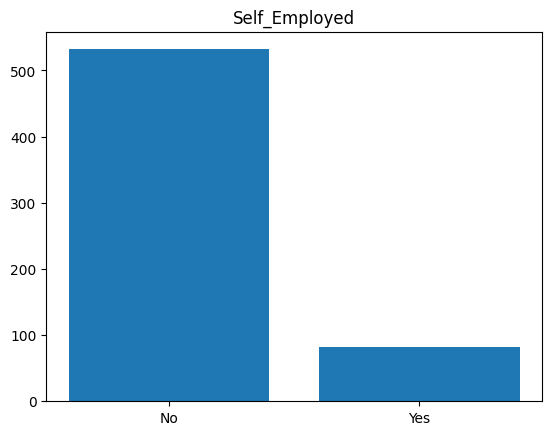

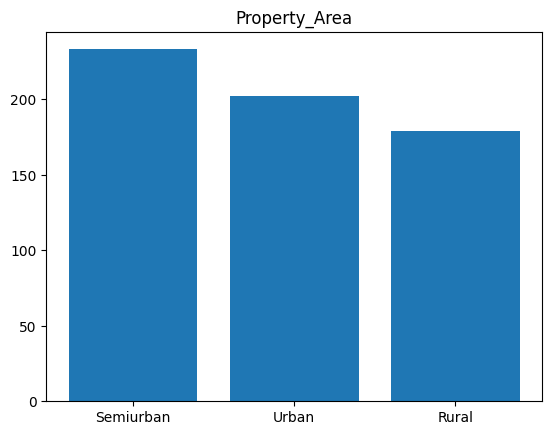

In [52]:
for col in cat_columns:
    col_data = train_df[col]
    value_counts = col_data.value_counts()
    plt.bar(value_counts.index, value_counts)
    plt.title(col)
    plt.show()

##### label encoding

In [53]:
for col in cat_columns:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [54]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106.0,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072.0,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583.0,0.0,187.000000,360.0,1.0,2


##### data transformation

In [55]:
# only for numerical columns
train_df[num_columns] = np.log1p(train_df[num_columns])
test_df[num_columns] = np.log1p(test_df[num_columns])

In [56]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674197,0.000000,4.993232,5.888878,0.693147,2
1,1,1,1,0,0,8.430327,7.319202,4.859812,5.888878,0.693147,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,5.888878,0.693147,2
3,1,1,0,1,0,7.857094,7.765993,4.795791,5.888878,0.693147,2
4,1,0,0,0,0,8.699681,0.000000,4.955827,5.888878,0.693147,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,5.888878,0.693147,0
610,1,1,3,0,0,8.320448,0.000000,3.713572,5.198497,0.693147,0
611,1,1,1,0,0,8.996280,5.484797,5.537334,5.888878,0.693147,2
612,1,1,2,0,0,8.933796,0.000000,5.236442,5.888878,0.693147,2


In [57]:
scalar = MinMaxScaler()
train_df = scalar.fit_transform(train_df)
test_df = scalar.transform(test_df)